In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn

from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
# pip install shap

In [20]:
star = pd.read_csv('star_classification.csv')
star

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [21]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [22]:
star.shape

(100000, 18)

In [23]:
star_renamed = star.rename({"u":"ultra_filter", "g":"green_filter", "r":"red_filter", "i":"nearInfar_filter", "z":"infared_filter", "MJD":"modi_Julian_date"}, axis = 1)

In [24]:
star_renamed.head()

,obj_ID,alpha,delta,ultra_filter,green_filter,red_filter,nearInfar_filter,infared_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,modi_Julian_date,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [25]:
star_renamed.isna().sum()

obj_ID              0
alpha               0
delta               0
ultra_filter        0
green_filter        0
red_filter          0
nearInfar_filter    0
infared_filter      0
run_ID              0
rerun_ID            0
cam_col             0
field_ID            0
spec_obj_ID         0
class               0
redshift            0
plate               0
modi_Julian_date    0
fiber_ID            0
dtype: int64

In [26]:
star_renamed.describe()

,obj_ID,alpha,delta,ultra_filter,green_filter,red_filter,nearInfar_filter,infared_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,modi_Julian_date,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [27]:
start_Ids_dropped = star_renamed.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID'])
start_Ids_dropped

,alpha,delta,ultra_filter,green_filter,red_filter,nearInfar_filter,infared_filter,cam_col,class,redshift,plate,modi_Julian_date
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,GALAXY,0.000000,9374,57749
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,GALAXY,0.404895,7626,56934
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,GALAXY,0.143366,2764,54535
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,GALAXY,0.455040,6751,56368


<AxesSubplot:xlabel='class', ylabel='alpha'>

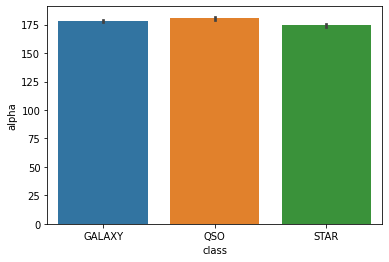

In [28]:
sns.barplot(x="class", y="alpha", data=start_Ids_dropped)

In [29]:
The above graph shows that quasars(QSO) is the star with the highest alpha(Right Ascension angle (at J2000 epoch)) spectral characteristic.

SyntaxError: invalid syntax (2262220836.py, line 1)

<AxesSubplot:xlabel='class', ylabel='delta'>

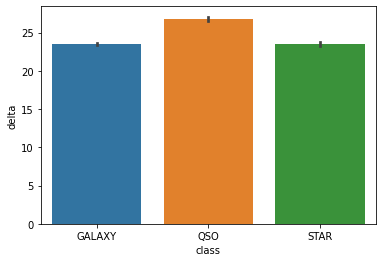

In [30]:
sns.barplot(x="class", y="delta", data=start_Ids_dropped)

In [31]:
The above graph shows that quasars(QSO) is the star with the highest delta(Declination angle (at J2000 epoch)) spectral characteristic.

SyntaxError: invalid syntax (1435484205.py, line 1)

<AxesSubplot:xlabel='class', ylabel='ultra_filter'>

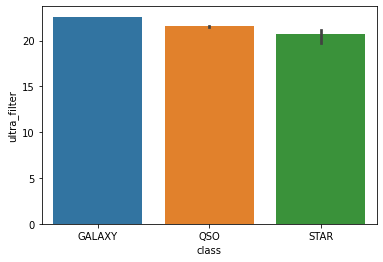

In [32]:
sns.barplot(x="class", y="ultra_filter", data=start_Ids_dropped)

In [ ]:
The above graph shows that galaxy has the highest Ultraviolet filter in the photometric system spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='green_filter'>

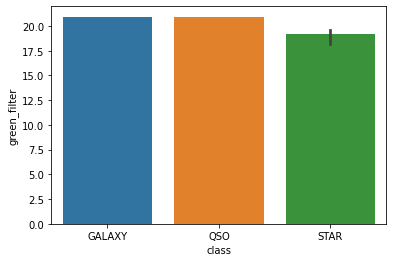

In [33]:
sns.barplot(x="class", y="green_filter", data=start_Ids_dropped)

In [ ]:
The above graph shows that galaxy and quasars(QSO) are both of high Green filter in the photometric system spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='red_filter'>

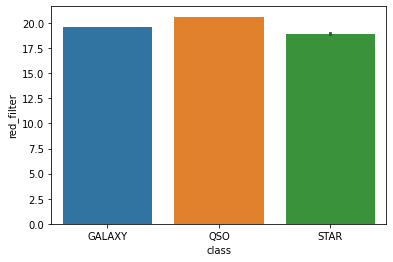

In [34]:
sns.barplot(x="class", y="red_filter", data=start_Ids_dropped)

In [ ]:
The above graph shows that quasars(QSO) has the highest Red filter in the photometric system spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='nearInfar_filter'>

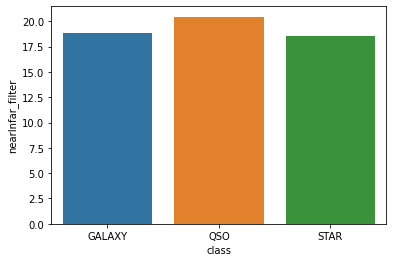

In [35]:
sns.barplot(x="class", y="nearInfar_filter", data=start_Ids_dropped)

In [ ]:
The above graph shows that quasars(QSO) has the highest Near Infrared filter in the photometric system spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='infared_filter'>

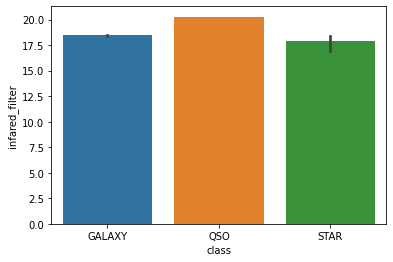

In [36]:
sns.barplot(x="class", y="infared_filter", data=start_Ids_dropped)

In [ ]:
The above graph shows that quasars(QSO) has the highest Infrared filter in the photometric system spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='cam_col'>

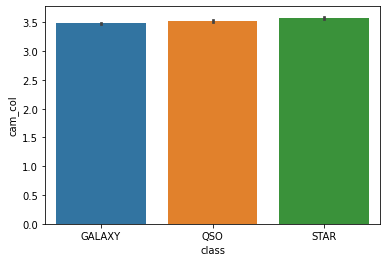

In [37]:
sns.barplot(x="class", y="cam_col", data=start_Ids_dropped)

In [ ]:
The above graph shows that star has the slightest highest Camera column to identify the scanline within the run as spectral characteristic.

<AxesSubplot:xlabel='class', ylabel='redshift'>

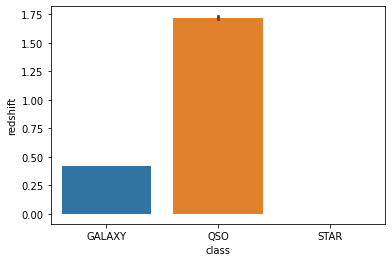

In [38]:
sns.barplot(x="class", y="redshift", data=start_Ids_dropped)

In [ ]:
The above graph shows that just galaxy and quasars(QSO) stars have redshift value based on the increase in wavelength as spectral characteristic and quasars(QSO) appears the higher.

<AxesSubplot:xlabel='class', ylabel='plate'>

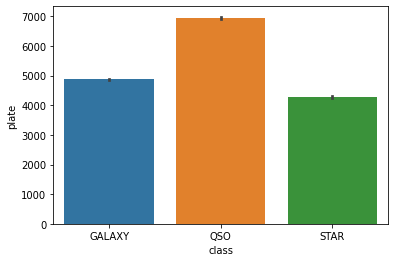

In [39]:
sns.barplot(x="class", y="plate", data=start_Ids_dropped)

In [ ]:
The above graph shows that just galaxy and quasars(QSO) stars have plate ID, identifies each plate in SDSS as spectral characteristic and quasars(QSO) appears the higher.

<AxesSubplot:xlabel='class', ylabel='modi_Julian_date'>

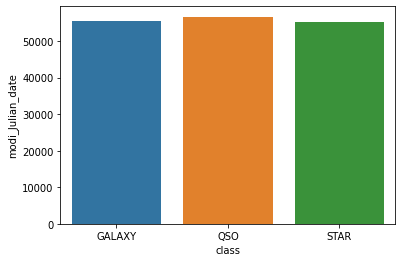

In [40]:
sns.barplot(x="class", y="modi_Julian_date", data=start_Ids_dropped)

In [ ]:
The above graph shows that all the three stars classes are of high Modified Julian Date as spectral characteristic and quasars(QSO) slightly appears the highest.

<AxesSubplot:>

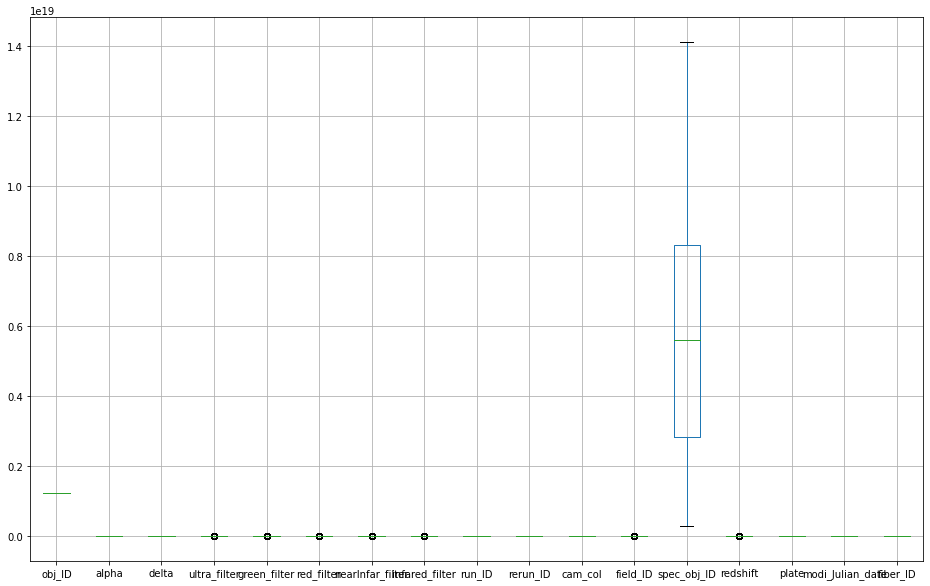

In [41]:
plt.figure(figsize=(16, 10))
star_renamed.boxplot()

In [ ]:
start_Ids_dropped.describe()

<AxesSubplot:>

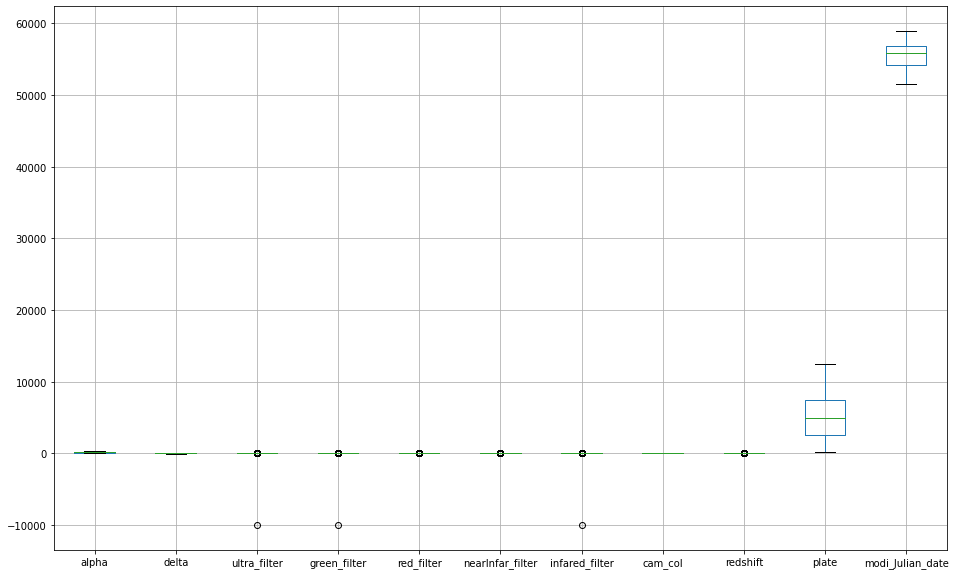

In [42]:
plt.figure(figsize=(16, 10))
start_Ids_dropped.boxplot()

In [49]:
y = start_Ids_dropped['class']
X = start_Ids_dropped.drop(columns=['class'])

In [50]:
def calcu_mult(start_Ids_dropped):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [51]:
calcu_mult(X)

,variables,VIF
0,alpha,4.494318
1,delta,2.626915
2,ultra_filter,1278.619429
3,green_filter,3871.994421
4,red_filter,3758.403239
5,nearInfar_filter,3816.870012
6,infared_filter,2011.903185
7,cam_col,5.900258
8,redshift,2.272859
9,plate,6.091842


<AxesSubplot:>

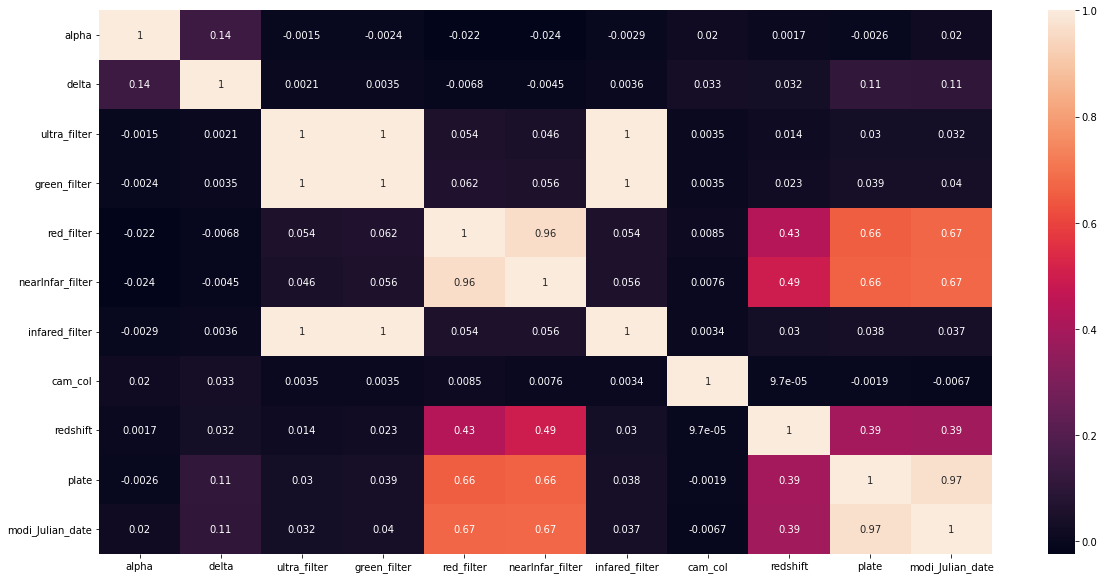

In [52]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr(), annot = True)

In [53]:
start_mulCor_dropped = start_Ids_dropped.drop(columns=['green_filter', 'nearInfar_filter'])
start_mulCor_dropped

,alpha,delta,ultra_filter,red_filter,infared_filter,cam_col,class,redshift,plate,modi_Julian_date
0,135.689107,32.494632,23.87882,20.39501,18.79371,2,GALAXY,0.634794,5812,56354
1,144.826101,31.274185,24.77759,22.58444,21.61427,5,GALAXY,0.779136,10445,58158
2,142.188790,35.582444,25.26307,20.60976,18.94827,2,GALAXY,0.644195,4576,55592
3,338.741038,-0.402828,22.13682,21.61162,19.25010,3,GALAXY,0.932346,9149,58039
4,345.282593,21.183866,19.43718,16.49747,15.54461,3,GALAXY,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,21.90404,20.73569,2,GALAXY,0.000000,9374,57749
99996,29.493819,19.798874,22.69118,20.45003,19.41526,1,GALAXY,0.404895,7626,56934
99997,224.587407,15.700707,21.16916,18.20428,17.35221,4,GALAXY,0.143366,2764,54535
99998,212.268621,46.660365,25.35039,19.91386,18.62482,4,GALAXY,0.455040,6751,56368


In [54]:
sns.barplot(x="gender", y="nose_wide", data=gender_data)

NameError: name 'gender_data' is not defined

In [55]:
y = start_mulCor_dropped['class']
x = start_mulCor_dropped.drop(columns=['class'], axis=1)

In [56]:
y.value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [57]:
sample = SMOTE(random_state=45)
x,y = sample.fit_resample(x,y)

In [58]:
y.value_counts()

GALAXY    59445
QSO       59445
STAR      59445
Name: class, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

In [60]:
Scaler = StandardScaler()
X_train_norm = pd.DataFrame(Scaler.fit_transform(X_train))

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_train_norm, y_train, test_size=.20, random_state=45)

In [61]:
model = PCA(n_components = 9)
model_ = model.fit(X_train_scale, y_train_scale)

In [62]:
pca = PCA(n_components=9)
model = pca.fit(X_train_scale)
PCA(n_components = 7)
print(model.explained_variance_ratio_)

[0.32439799 0.22636217 0.11945112 0.10627584 0.09135692 0.08005441
 0.04536464 0.00378663 0.00295027]


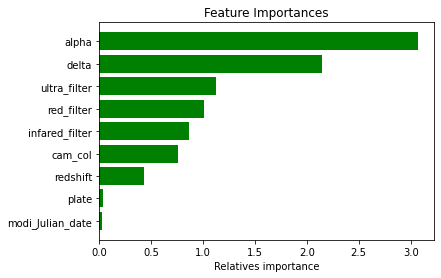

In [63]:
features = x.columns
importances = model_.explained_variance_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relatives importance')
plt.show()

In [64]:
X_train_scale

,0,1,2,3,4,5,6,7,8
88400,-1.274959,-1.284380,-0.116618,-0.700916,-0.147758,-0.925846,-0.813450,-1.098662,-1.304943
48594,1.791692,-1.189648,-0.207904,-1.496717,-0.431649,1.667534,-0.599075,-1.659814,-2.167536
97501,0.224290,0.520054,-0.117980,0.446949,0.215815,1.019189,0.581756,1.627171,1.545220
62917,-0.677691,0.820795,0.102588,0.711410,0.067599,1.019189,-0.215904,-0.570480,-0.270941
60166,-0.598353,1.391463,-0.012633,0.907170,0.284039,-0.277501,0.623104,0.978766,1.106435
...,...,...,...,...,...,...,...,...,...
49315,-0.180781,1.654266,-0.156981,0.467987,0.167636,-0.277501,1.510490,0.938136,0.944456
81853,0.179436,-0.852757,0.013009,0.561612,0.304358,0.370844,1.913797,0.016315,0.138444
60960,-0.572886,1.140358,-0.084775,0.031349,0.088402,-0.277501,-0.813553,0.669716,0.546165
137084,-1.646394,-1.062828,0.103808,0.568468,0.026963,1.667534,-0.168850,-0.352680,-0.111181


In [65]:
X_train_scale.shape

(114134, 9)

In [66]:
y_train_scale.shape

(114134,)

In [67]:
model = LogisticRegression()
model_ = model.fit(X_train_scale, y_train_scale)
model_

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [68]:
coef_deter = model_.score(X_train_scale, y_train_scale)
coef_deter

0.9597140203620306

In [69]:
y_predict = model_.predict(X_test_scale)

In [70]:
cf_matrix = confusion_matrix(y_test_scale, y_predict)
cf_matrix

array([[8947,  328,  286],
       [ 599, 8915,    3],
       [   0,    2, 9454]], dtype=int64)

In [71]:
cv = RepeatedKFold(n_splits = 10, n_repeats = 4, random_state= 1)
cv

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [73]:
# score = cross_val_score(model, X_test_scale, y_test_scale, scoring = 'accuracy', cv = cv, n_jobs = 1, error_score='raise')
# np.mean(score)

In [74]:
classification_report(y_test_scale, y_predict)
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

      GALAXY       0.94      0.94      0.94      9561
         QSO       0.96      0.94      0.95      9517
        STAR       0.97      1.00      0.98      9456

    accuracy                           0.96     28534
   macro avg       0.96      0.96      0.96     28534
weighted avg       0.96      0.96      0.96     28534



In [75]:
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(X_train_scale, y_train_scale)

SVC(random_state=1)

In [76]:
Y_pred = classifier.predict(X_test_scale)

In [77]:
Y_pred

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'GALAXY'],
      dtype=object)

In [78]:
cf_matrix = confusion_matrix(y_test_scale, Y_pred)
cf_matrix

array([[9124,  167,  270],
       [ 503, 9008,    6],
       [   3,    0, 9453]], dtype=int64)

In [79]:
clf = RandomForestClassifier(n_estimators = 100)

In [80]:
clf.fit(X_train_scale, y_train_scale)
y_predict = clf.predict(X_test_scale)

In [81]:
y_prob = clf.predict_proba(X_test_scale)

In [82]:
print(confusion_matrix(y_test_scale, y_predict))
print(classification_report(y_test_scale, y_predict))

[[9335  192   34]
 [ 306 9211    0]
 [   1    0 9455]]
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97      9561
         QSO       0.98      0.97      0.97      9517
        STAR       1.00      1.00      1.00      9456

    accuracy                           0.98     28534
   macro avg       0.98      0.98      0.98     28534
weighted avg       0.98      0.98      0.98     28534



In [83]:
classes = clf.classes_


In [84]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [85]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [89]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

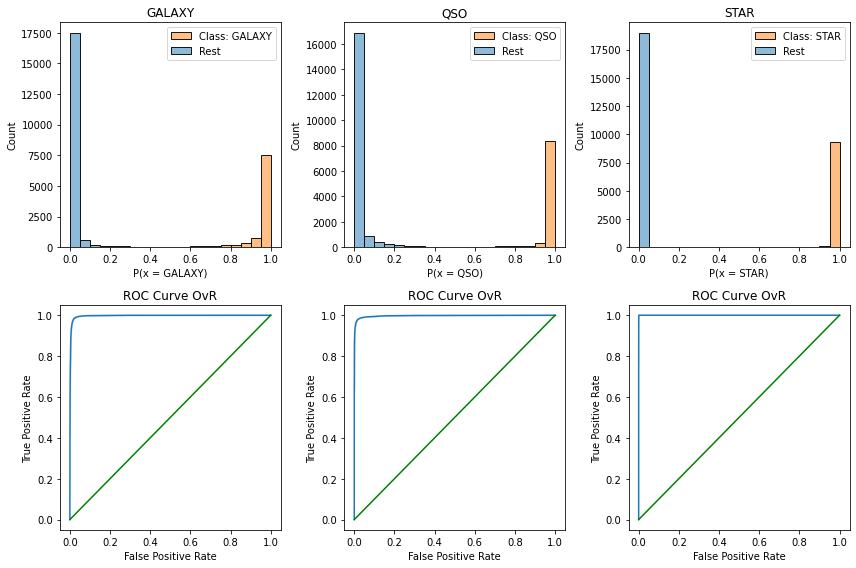

In [90]:
from sklearn.metrics import roc_auc_score

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test_scale.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test_scale]
    df_aux['prob'] = y_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [98]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = sklearn.SVM.model_SVC(kernel = 'rbf', random_state = 1)(max_iter=10000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

AttributeError: module 'sklearn' has no attribute 'SVM'